# Correlações Entre Variáveis

### Correlações Quanti vs Quanti

In [2]:
import pandas as pd 
import numpy as np 

In [3]:
df = pd.read_csv('Datasets/base_ifood_limpa.csv', sep=';', header=0).drop(columns=['Unnamed: 0'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391674 entries, 0 to 391673
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   availableForScheduling  391674 non-null  bool   
 1   category                391674 non-null  object 
 2   delivery_fee            391674 non-null  float64
 3   delivery_time           391674 non-null  int64  
 4   distance                391674 non-null  float64
 5   minimumOrderValue       391674 non-null  float64
 6   price_range             391674 non-null  object 
 7   rating                  391674 non-null  float64
dtypes: bool(1), float64(4), int64(1), object(2)
memory usage: 21.3+ MB


In [5]:
df

,availableForScheduling,category,delivery_fee,delivery_time,distance,minimumOrderValue,price_range,rating
0,False,Marmita,3.99,27,1.22,10.0,CHEAPEST,0.00000
1,False,Açaí,7.99,61,4.96,10.0,CHEAPEST,0.00000
2,False,Bebidas,11.99,70,8.35,5.0,MODERATE,0.00000
3,False,Carnes,16.49,63,6.35,20.0,CHEAPEST,0.00000
4,False,Brasileira,11.99,58,5.22,20.0,CHEAPEST,0.00000
...,...,...,...,...,...,...,...,...
391669,False,Açaí,9.00,60,3.53,30.0,CHEAPEST,4.95000
391670,False,Açaí,6.00,50,2.60,10.0,CHEAPEST,0.00000
391671,False,Açaí,0.00,40,3.61,0.0,CHEAPEST,4.46602
391672,False,Lanches,8.00,60,3.54,20.0,CHEAPEST,5.00000


In [6]:
numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categoricas = df.select_dtypes(include=['object']).columns.tolist()

In [7]:
df[numericas].corr()

,delivery_fee,delivery_time,distance,minimumOrderValue,rating
delivery_fee,1.000000,0.208230,0.724071,0.059945,0.030999
delivery_time,0.208230,1.000000,0.423321,0.025275,-0.138348
distance,0.724071,0.423321,1.000000,0.084524,-0.022032
minimumOrderValue,0.059945,0.025275,0.084524,1.000000,0.047161
rating,0.030999,-0.138348,-0.022032,0.047161,1.000000


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

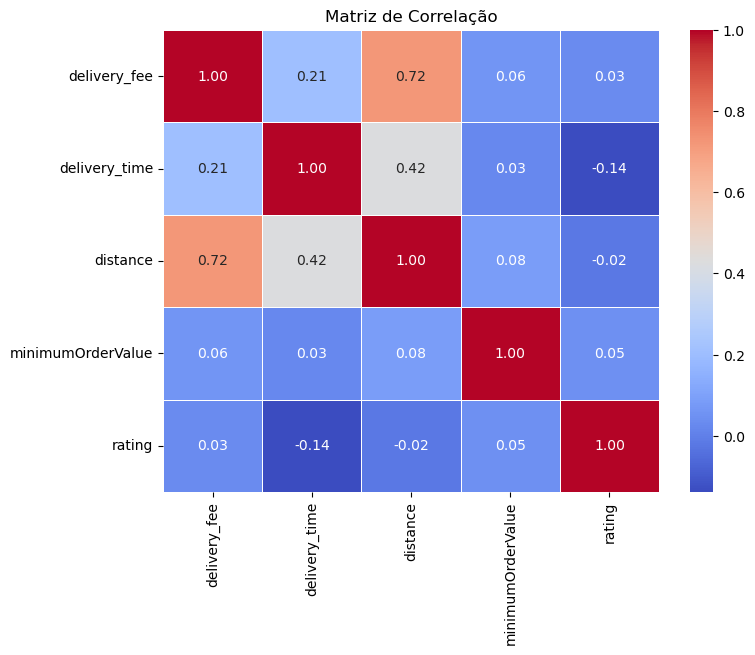

In [9]:
# Configura o tamanho da figura
plt.figure(figsize=(8, 6))

# Criar o mapa de calor
sns.heatmap(df[numericas].corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5)

# Adicionar título
plt.title('Matriz de Correlação')
plt.show()

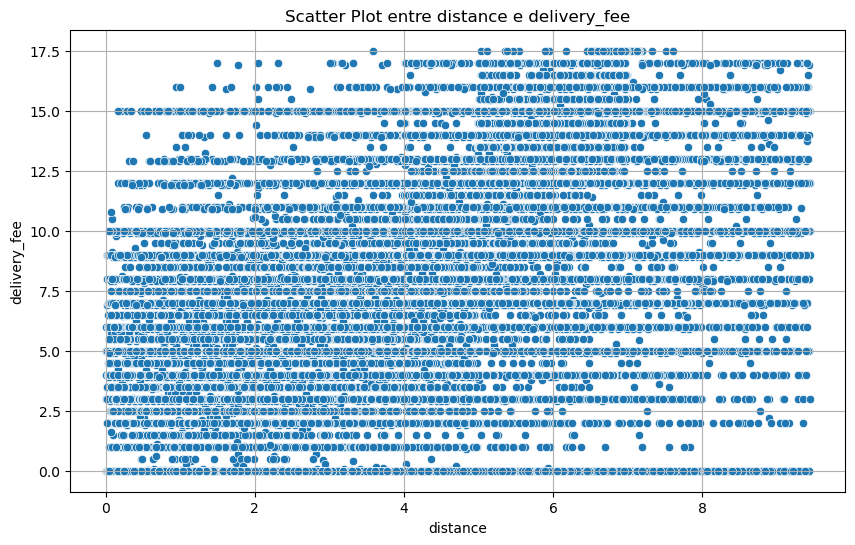

In [10]:
# 2 - Plotar scatterplots

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='distance', y='delivery_fee')
plt.title('Scatter Plot entre distance e delivery_fee')
plt.xlabel("distance")
plt.ylabel("delivery_fee")
plt.grid()
plt.show()

# Correlações Quali vs Quanti

In [14]:
df = pd.read_csv("Datasets/base_ifood_limpa.csv", sep=';', header=0).drop(columns=['Unnamed: 0'])

In [15]:
numericas = df.select_dtypes(include=['number']).columns.tolist()
categoricas = df.select_dtypes(include=['object']).columns.tolist()


In [16]:
numericas

['delivery_fee', 'delivery_time', 'distance', 'minimumOrderValue', 'rating']

In [17]:
categoricas

['category', 'price_range']

In [19]:
df["category"].value_counts()

category
Lanches            96750
Brasileira         71638
Doces & Bolos      38706
Pizza              34393
Açaí               21824
Marmita            16332
Bebidas            12524
Japonesa           12370
Saudável            9500
Salgados            9423
Carnes              7922
Italiana            6450
Hambúrguer          6264
Sorvetes            5865
Pastel              5801
Padaria             4126
Variada             3935
Mercado             3077
Cafeteria           3076
Conveniência        2937
Árabe               2642
Cozinha Rápida      2445
Congelados          1918
Chinesa             1841
Frutos Do Mar       1275
Mexicana             845
Vegetariana          836
Vegana               631
Peixes               610
Frangos              561
Contemporânea        534
Francesa             487
Casa de Sucos        351
Argentina            345
Sopas & Caldos       299
Portuguesa           288
Mineira              262
Nordestina           258
Tapioca              240
Crepe           

In [21]:
categories_to_use = ["Lanche", "Brasileira", "Doces & Bolos", "Açaí", "Pizza"]

df_temp = df[df["category"].isin(categories_to_use)]

In [23]:
df_temp.groupby("category")["minimumOrderValue"].agg(['mean'])

,mean
category,
Açaí,10.029079
Brasileira,15.166077
Doces & Bolos,10.435906
Pizza,17.591943


<Axes: xlabel='category'>

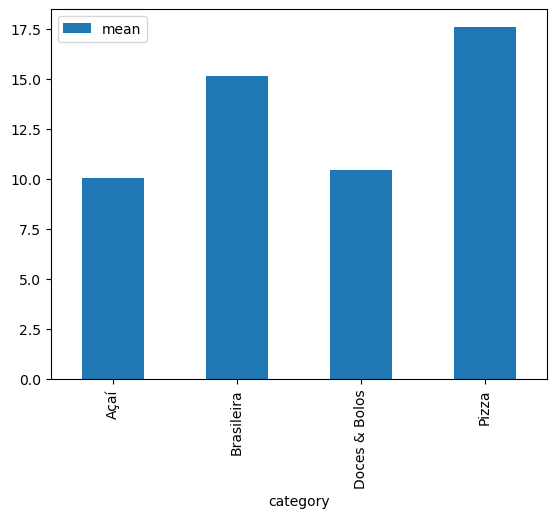

In [25]:
df_temp.groupby('category')['minimumOrderValue'].agg(['mean']).plot.bar()

In [26]:
df_temp.groupby('category')['minimumOrderValue'].agg(['mean', np.std])

/var/folders/8_/svht3n8x0djgvxx_br_x3vqh0000gn/T/ipykernel_84057/3150196149.py:1: FutureWarning: The provided callable <function std at 0x10ac88e00> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  df_temp.groupby('category')['minimumOrderValue'].agg(['mean', np.std])


,mean,std
category,,
Açaí,10.029079,4.759467
Brasileira,15.166077,7.061473
Doces & Bolos,10.435906,4.461472
Pizza,17.591943,9.349869


<Axes: title={'center': 'minimumOrderValue'}, xlabel='category'>

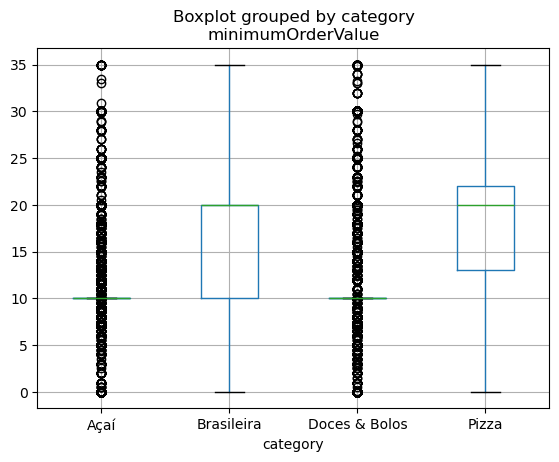

In [27]:
df_temp.boxplot(column='minimumOrderValue', by='category')

In [28]:
df.groupby('category')[['delivery_fee', 'delivery_time']].agg(['mean'])

,delivery_fee,delivery_time
,mean,mean
category,,
Africana,6.935057,46.344828
Alemã,7.954327,43.964912
Argentina,6.239739,42.582609
Asiática,8.468881,45.559441
Açaí,6.334909,44.831424
Baiana,8.323311,45.479730
Bebidas,7.408195,42.791281
Brasileira,6.634203,45.832310


<Axes: xlabel='price_range'>

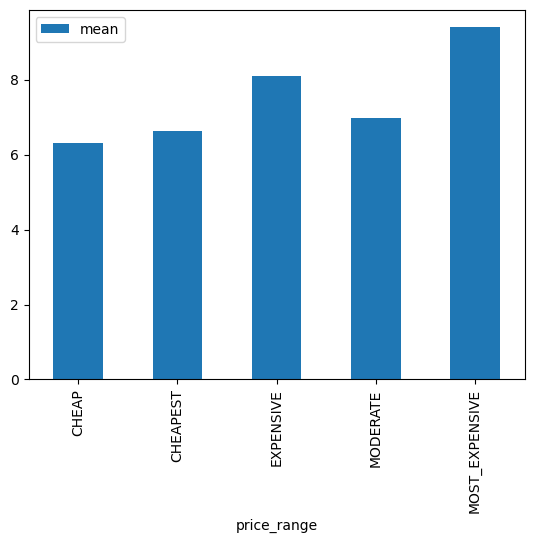

In [30]:
df.groupby("price_range")['delivery_fee'].agg(['mean']).plot.bar()